# I've chosen a data set, containng information about cars (price, make, model, year, engine vollume, etc.).
# My goal is to train a model to predict a car's price.

In [1]:
import sys
import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read the data:

In [230]:
original_data = pd.read_csv('data.csv' , encoding='latin-1')
print(original_data.shape)
original_data.head()

(9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [231]:
original_data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


## Plot the prices:

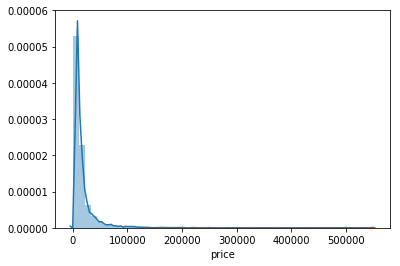

In [232]:
sns.distplot(original_data.price);

## Plot only the prices lower than 50 000, so we can see the distribution better:

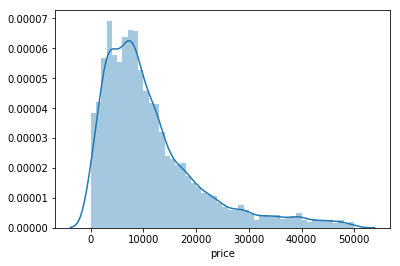

In [233]:
sns.distplot(original_data.price[original_data.price < 50000]);

In [234]:
data = original_data.copy()

## Remove rows where price=0

In [235]:
data = data[data.price != 0]

## Check data for nulls:

In [236]:
data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            425
engType           0
registration      0
year              0
model             0
drive           492
dtype: int64

## Remove all entries with no information about the engine vollume (engV)

In [237]:
data = data[original_data.engV.notnull()]
print(data.shape)
data.isnull().sum()

(8884, 10)


C:\Users\totok\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           389
dtype: int64

## We see that there are some rows with null 'drive', so let's plot it:

Number of rows with null 'drive': 389


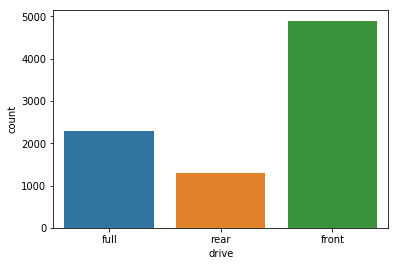

In [238]:
print("Number of rows with null 'drive': {}".format(data[data.drive.isnull()].shape[0]))
sns.countplot(data.drive);

## Since there are only 389 rows with null 'drive', we can remove them:

In [239]:
data = data[data.drive.notnull()]
print(data.shape)
data.isnull().sum()

(8495, 10)


car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

## Done! There are no more nulls, so we can continue...

Cars where body=='other': 697


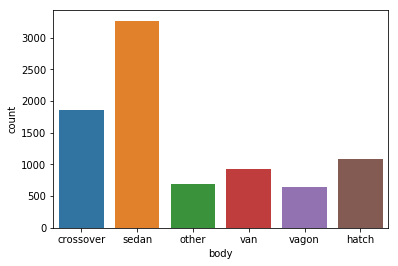

In [240]:
# crossover - SUV
# vagon - combi
# hatch - hatchback

print("Cars where body=='other': {}".format(data[data.body=='other'].shape[0]))

sns.countplot(data.body);

## 'drive' feature:

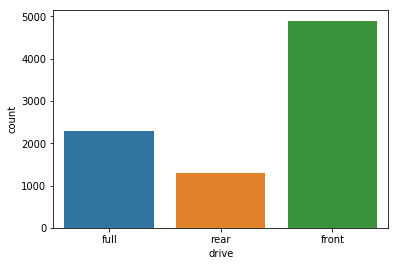

In [241]:
sns.countplot(data.drive);

In [255]:
print(data['car'].unique().shape)
data['car'].unique()

(83,)


array(['Ford', 'Mercedes-Benz', 'Nissan', 'Honda', 'Renault', 'BMW',
       'Volkswagen', 'Audi', 'Chrysler', 'Jaguar', 'Mitsubishi', 'Kia',
       'Porsche', 'Toyota', 'Hyundai', 'Opel', 'Chevrolet', 'Skoda',
       'Land Rover', 'Daewoo', 'Mazda', 'Lexus', 'Infiniti', 'Subaru',
       'VAZ', 'Alfa Romeo', 'Smart', 'Peugeot', 'Suzuki', 'Chery',
       'Bentley', 'Volvo', 'ZAZ', 'Citroen', 'Dodge', 'Fiat', 'Jeep',
       'SsangYong', 'Seat', 'MINI', 'Dacia', 'Hummer', 'Geely', 'Maserati',
       'BYD', 'Cadillac', 'Acura', 'Aston Martin', 'Tesla', 'Rover', 'GAZ',
       'GMC', 'Lincoln', 'Moskvich-AZLK', 'FAW', 'UAZ', 'TATA', 'ZX',
       'Lifan', 'Mercury', 'Groz', 'Great Wall', 'Moskvich-Izh', 'Saab',
       'Lancia', 'Aro', 'Ferrari', 'Bogdan', 'Dadi', 'Rolls-Royce', 'MG',
       'Samand', 'JAC', 'Samsung', 'Lamborghini', 'Daihatsu', 'Hafei',
       'SMA', 'ËUAZ', 'Isuzu', 'Huanghai', 'Wartburg', 'Buick'], dtype=object)

In [253]:
data['model'].unique().shape

(847,)

## Drop the 'model' column:

In [256]:
data = data.drop('model', axis=1)

In [257]:
data.head()

,car,price,body,mileage,engV,engType,registration,year,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,full


In [258]:
data.describe()

,price,mileage,engV,year
count,8495.000000,8495.000000,8495.000000,8495.000000
mean,16185.453305,141.744202,2.568337,2006.500883
std,24449.641512,97.464062,5.387238,6.925907
min,259.350000,0.000000,0.100000,1959.000000
25%,5490.000000,74.000000,1.600000,2004.000000
50%,9500.000000,130.000000,2.000000,2008.000000
75%,17145.600000,197.000000,2.500000,2011.000000
max,547800.000000,999.000000,99.990000,2016.000000


### Define the regression function:

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def do_linear_regression(X, y, return_train_test=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print("train: {}".format(regressor.score(X_train, y_train)))
    print("test: {}".format(regressor.score(X_test, y_test)))
    if (return_train_test) :
        return regressor, X_train, X_test, y_train, y_test
    else:
        return regressor

In [259]:
numeric_data = data[['price', 'mileage', 'engV', 'year']].copy()
numeric_data['year'] = 2017 - numeric_data['year']
numeric_data.rename(columns={('year'): ('yearsOld')}, inplace=True)

numeric_data = numeric_data[numeric_data['price'] < 50000]
numeric_data = numeric_data[numeric_data['price'] > 500]

print(numeric_data.shape)
numeric_data.describe()

(8031, 4)


,price,mileage,engV,yearsOld
count,8031.000000,8031.000000,8031.000000,8031.000000
mean,11869.459305,147.879841,2.502353,10.884074
std,9597.066145,95.228195,5.524507,6.793934
min,537.225000,0.000000,0.110000,1.000000
25%,5200.000000,83.000000,1.600000,6.000000
50%,9000.000000,136.000000,2.000000,10.000000
75%,15197.195300,200.000000,2.500000,13.500000
max,49999.000000,999.000000,99.990000,56.000000


In [260]:
X = numeric_data.drop('price', axis=1)
y = numeric_data['price']

regr = do_linear_regression(X, y)

train: 0.2949309407593418
test: 0.29308633700230957


In [261]:
regr.coef_

array([ -12.05052761,  170.14262344, -679.19321144])

## One-hot endocing:

In [263]:
body = pd.get_dummies(data['body'])
body.rename(columns={('other'): ('other_body')}, inplace=True)

drive = pd.get_dummies(data['drive'])

engType = pd.get_dummies(data['engType'])
engType.rename(columns={('Other'): ('other_engType')}, inplace=True)

reg = pd.get_dummies(data['registration']).drop('no', axis=1)
reg.rename(columns={('yes'): ('isRegistered')}, inplace=True)

car = pd.get_dummies(data['car'])

In [265]:
encoded_data = numeric_data.copy()

encoded_data = encoded_data.join(body)
encoded_data = encoded_data.join(drive)
encoded_data = encoded_data.join(reg)
#encoded_data = encoded_data.join(engType)
encoded_data = encoded_data.join(car)

In [266]:
X = encoded_data.drop('price', axis=1)
y = encoded_data['price']
regr = do_linear_regression(X, y)

train: 0.7049271972047886
test: 0.6923628559816707


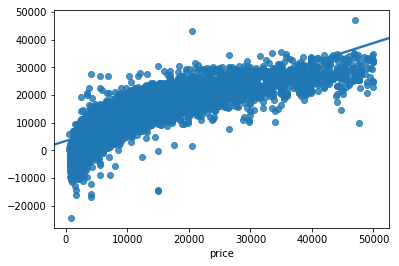

In [267]:
sns.regplot(y, regr.predict(X))

# Conclusion:

## Best results:

### train: 0.7049271972047886
### test: 0.6923628559816707


